In [1]:
# Installing library from yahoo finance
#!pip install yfinance

#### Choosing the dataset ####

In [2]:
# Downloading libraries
import yfinance as yf
import pandas as pd

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Definying tickets and historic period to be analysed
tickers = ["AAPL", "MSFT"]
start_date = "2018-01-01"
end_date = "2023-01-01"

# Downloading tickers and data.
data = yf.download(tickers, start=start_date, end=end_date)

# Saving the data as CSV format
data['Adj Close'].to_csv("AAPL_MSFT_stock_prices.csv")

# Print first 10 line to check
print(data['Adj Close'].head())

[*********************100%%**********************]  2 of 2 completed

Ticker           AAPL       MSFT
Date                            
2018-01-02  40.670979  80.080902
2018-01-03  40.663898  80.453606
2018-01-04  40.852783  81.161713
2018-01-05  41.317894  82.167961
2018-01-08  41.164433  82.251823


#### Cleaning the data ####
##### Check and fix  null values, inconsitency on the dataset and e prepare the data to be analyzed #####

In [37]:
import pandas as pd

In [38]:
# Load the dataset
data = pd.read_csv("AAPL_MSFT_stock_prices.csv", index_col='Date', parse_dates=True)

In [39]:
data.shape

(1259, 2)

In [40]:

# Veryfying null values
print("Null values:")
print(data.isnull().sum())

Null values:
AAPL    0
MSFT    0
dtype: int64


In [41]:
# Data type
print("Data type:")
print(data.dtypes)

Data type:
AAPL    float64
MSFT    float64
dtype: object


In [42]:
# Describe basic statistics to try to indentify outliers.
print("Description Statistics:")
print(data.describe())

Description Statistics:
              AAPL         MSFT
count  1259.000000  1259.000000
mean     96.154784   188.115134
std      46.357006    74.733208
min      34.075405    79.205086
25%      49.170340   113.870121
50%      89.611084   195.281830
75%     141.196686   250.434769
max     179.724564   336.315338


#### EDA ####

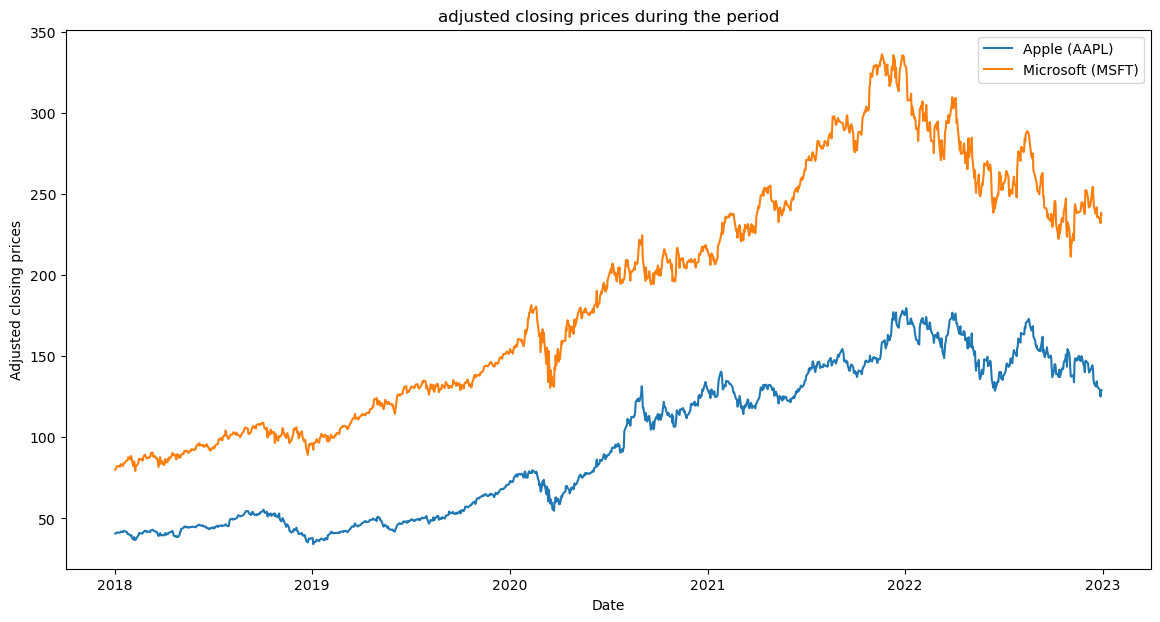

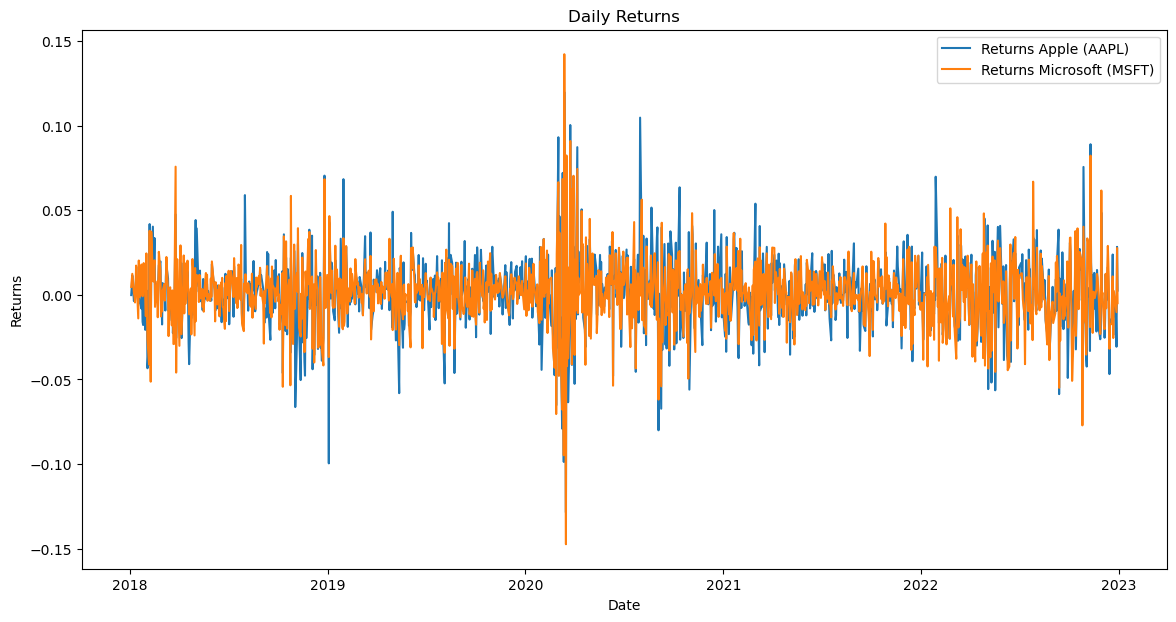

Return correlations between APPLE and Microsoft stocks:
          AAPL      MSFT
AAPL  1.000000  0.772959
MSFT  0.772959  1.000000


In [43]:
import matplotlib.pyplot as plt


# Ploting 
plt.figure(figsize=(14, 7))
plt.plot(data['AAPL'], label='Apple (AAPL)')
plt.plot(data['MSFT'], label='Microsoft (MSFT)')
plt.title('adjusted closing prices during the period')
plt.xlabel('Date')
plt.ylabel('Adjusted closing prices')
plt.legend()
plt.show()

# Calculating and ploting the  daily profit or loss (daily return)
returns = data.pct_change()
plt.figure(figsize=(14, 7))
plt.plot(returns['AAPL'], label= 'Returns Apple (AAPL)')
plt.plot(returns['MSFT'], label='Returns Microsoft (MSFT)')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Looking for correlations
correlation = returns.corr()
print("Return correlations between APPLE and Microsoft stocks:")
print(correlation)

##### The correlation of 0.772959 between the returns of Apple (AAPL) and Microsoft (MSFT) stocks shows a strong positive correlation. This means that generally, when the stock price of one of these companies goes up or down, the stock price of the other tends to move in the same direction. #####

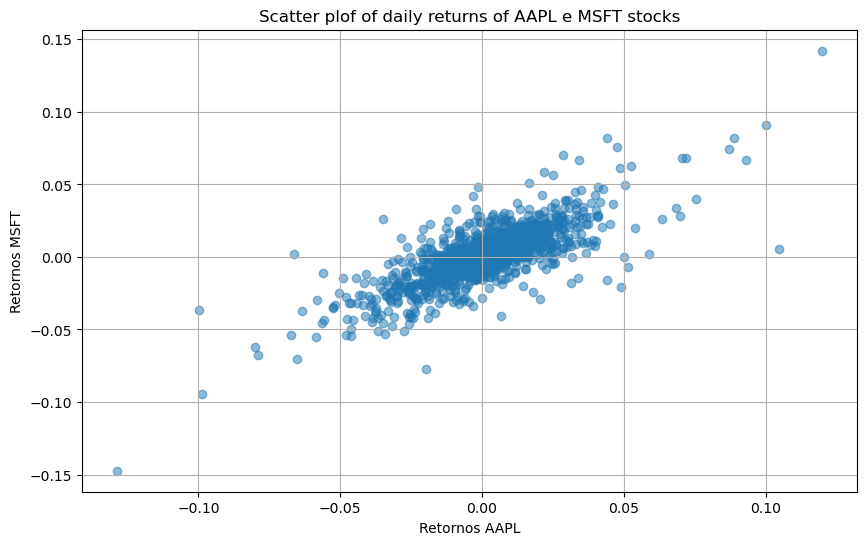

In [44]:
# Scatter plot of daily returnsplt.figure(figsize=(10, 6))
plt.scatter(returns['AAPL'], returns['MSFT'], alpha=0.5)
plt.title('Scatter plof of daily returns of AAPL e MSFT stocks')
plt.xlabel('Retornos AAPL')
plt.ylabel('Retornos MSFT')
plt.grid(True)
plt.show()

#### Clustering ####
##### Lets identify and segment trading days with distinct market behaviors for AAPL and MSFT. In this problem, we will apply clustering to daily returns and volatilities to better understand the different conditions of market clusters over time. This can help identify days with high volatility, stabilized market movements, or anomalous trends, which are critical for investment strategies and risk management. #####

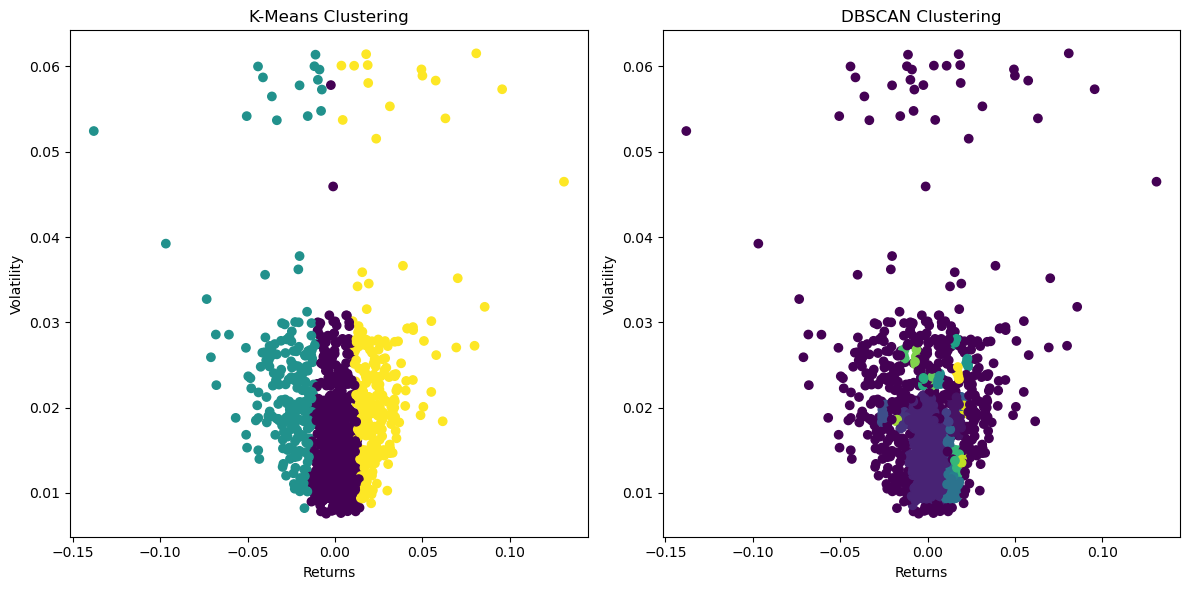

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt


# Calculating the volatiity and withe the standard deviation into a move window of 30 days)
volatility = returns.rolling(window=30).std().dropna()

# Preparing the dataframe to clustering
features = pd.DataFrame()
features['returns'] = returns.mean(axis=1)  #  returns daily mean of AAPL e MSFT
features['volatility'] = volatility.mean(axis=1)
features.dropna(inplace=True)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
features['kmeans_cluster'] = kmeans.fit_predict(features[['returns', 'volatility']])

# DBSCAN
dbscan = DBSCAN(eps=0.001, min_samples=5)
features['dbscan_cluster'] = dbscan.fit_predict(features[['returns', 'volatility']])

# Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(features['returns'], features['volatility'], c=features['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Returns')
plt.ylabel('Volatility')

plt.subplot(122)
plt.scatter(features['returns'], features['volatility'], c=features['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Returns')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()

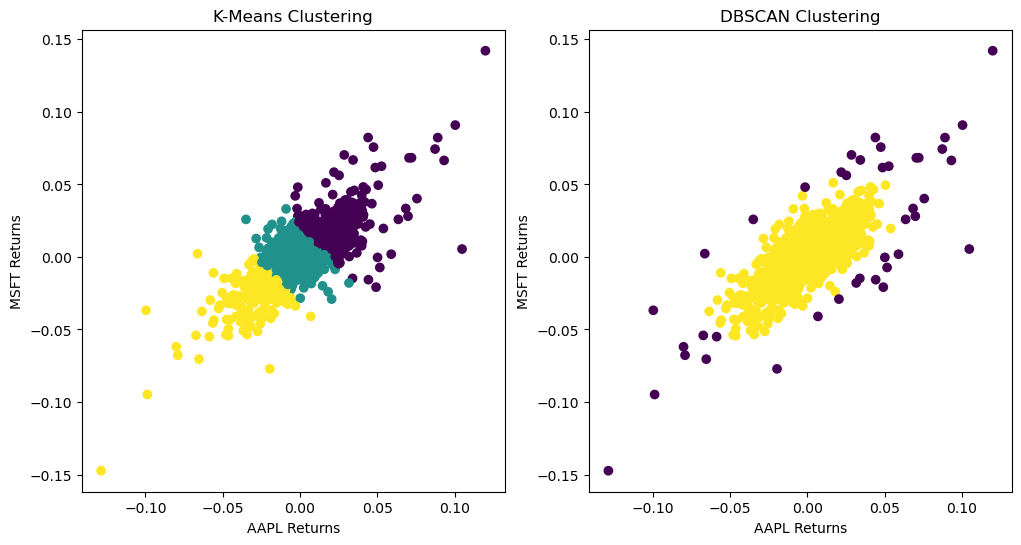

Silhouette Score for K-Means: 0.4287175644230067
Davies-Bouldin Index for K-Means: 0.7955493235812418
Silhouette Score for DBSCAN: 0.6440958709739074
Davies-Bouldin Index for DBSCAN: 4.06228472095064


In [49]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load and preprocess data
data = pd.read_csv('AAPL_MSFT_stock_prices.csv', index_col='Date', parse_dates=True)
returns = data.pct_change().dropna()

# Prepare data for clustering
X = returns.values

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans_labels = kmeans.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.01, min_samples=5).fit(X)
dbscan_labels = dbscan.labels_

# Evaluate Clusters
silhouette_kmeans = silhouette_score(X, kmeans_labels)
db_index_kmeans = davies_bouldin_score(X, kmeans_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels)
db_index_dbscan = davies_bouldin_score(X, dbscan_labels)

# Plotting the clusters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(returns.iloc[:, 0], returns.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('AAPL Returns')
plt.ylabel('MSFT Returns')

plt.subplot(122)
plt.scatter(returns.iloc[:, 0], returns.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('AAPL Returns')
plt.ylabel('MSFT Returns')

plt.show()

print("Silhouette Score for K-Means:", silhouette_kmeans)
print("Davies-Bouldin Index for K-Means:", db_index_kmeans)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)
print("Davies-Bouldin Index for DBSCAN:", db_index_dbscan)


##### Time series ####
##### ARIMA #####

In [46]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

def fit_arima(series, order):
    model = ARIMA(series, order=order)
    return model.fit()

# Apple stock ARIMA model
arima_aapl = fit_arima(data['AAPL'], (1, 1, 1))
print(arima_aapl.summary())

# Microsoft stock ARIMA model
arima_msft = fit_arima(data['MSFT'], (1, 1, 1))
print(arima_msft.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.728
Date:                Mon, 29 Apr 2024   AIC                           5543.456
Time:                        22:47:45   BIC                           5558.868
Sample:                             0   HQIC                          5549.248
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3930      0.247      1.591      0.112      -0.091       0.877
ma.L1         -0.4548      0.242     -1.883      0.060      -0.928       0.019
sigma2         4.7775      0.115     41.385      0.0

##### The ARIMA(1,1,1) models for Apple (AAPL) and Microsoft (MSFT) show different dynamics. For AAPL, neither the AR nor MA coefficients are statistically significant, indicating a weaker predictive power. The negative MA coefficient suggests a slight mean reversion tendency. MSFT's AR and MA coefficients are also not significant, showing minimal impact from past values on future prices. Both models exhibit high volatility (sigma2), with MSFT's volatility notably higher than AAPL's. These models may need refinement or the inclusion of additional variables to better capture the complexities of stock price movements. #####

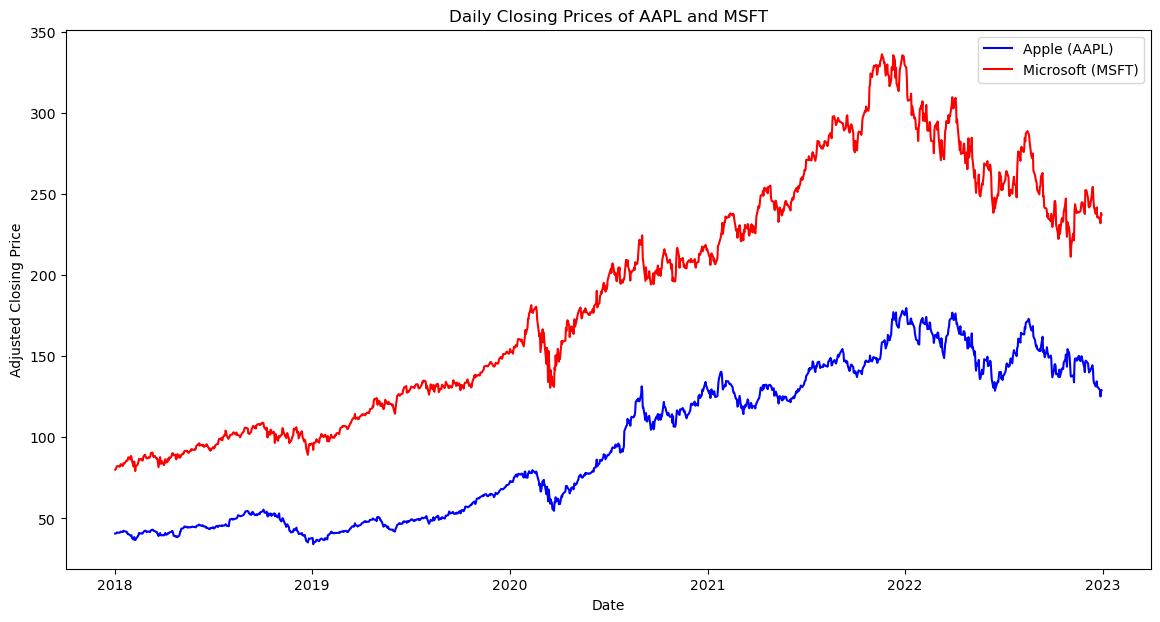

Results of Dickey-Fuller Test for AAPL:
Test Statistic: -1.0638032701159088
p-value: 0.7292888595738051
Number of Lags Used: 11
Number of Observations Used: 1247
Critical Values:
   1%: -3.4356048614183443
   5%: -2.8638605461891617
   10%: -2.5680054872544145
Results of Dickey-Fuller Test for MSFT:
Test Statistic: -1.2874764669749124
p-value: 0.634882191727409
Number of Lags Used: 9
Number of Observations Used: 1249
Critical Values:
   1%: -3.4355964295197743
   5%: -2.863856825923603
   10%: -2.5680035060041626


In [47]:
#Adjusted closing prices of AAPL e MSFT stocks

from statsmodels.tsa.stattools import adfuller

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['AAPL'], label='Apple (AAPL)', color='blue')
plt.plot(data.index, data['MSFT'], label='Microsoft (MSFT)', color='red')
plt.title('Daily Closing Prices of AAPL and MSFT')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

#Function to perform stationary test and plotting results.
def perform_adfuller_test(series, name):
    result = adfuller(series, autolag='AIC')
    print(f'Results of Dickey-Fuller Test for {name}:')
    print(f'Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of Lags Used: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

#Perfoming Dickey-Fuller test to verify stationary
perform_adfuller_test(data['AAPL'], 'AAPL')
perform_adfuller_test(data['MSFT'], 'MSFT')


#### SARIMAX ##### 
##### Fitting SARIMAX model and generating forecast ######

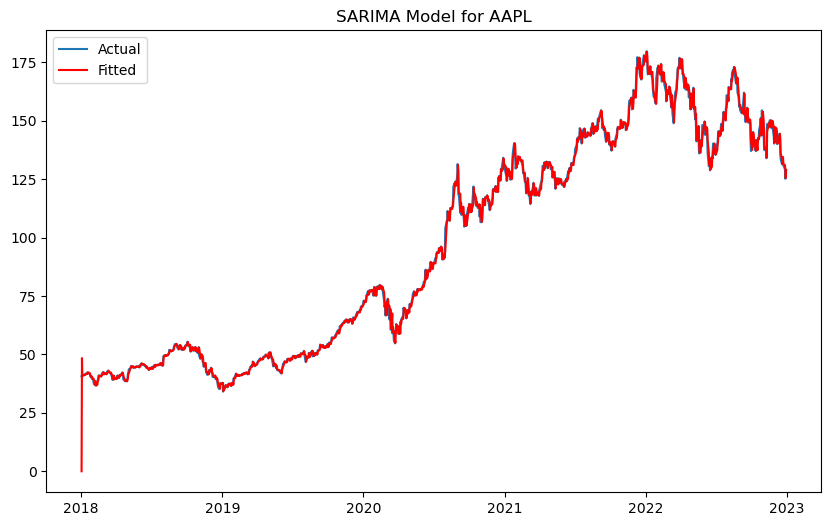

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2765.338
Date:                Mon, 29 Apr 2024   AIC                           5536.676
Time:                        22:47:48   BIC                           5552.083
Sample:                             0   HQIC                          5542.466
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3811      0.251      1.521      0.128      -0.110       0.872
ma.L1         -0.4433      0.245     -1.808      0.071      -0.924       0.037
sigma2         4.7851      0.116     41.315      0.0

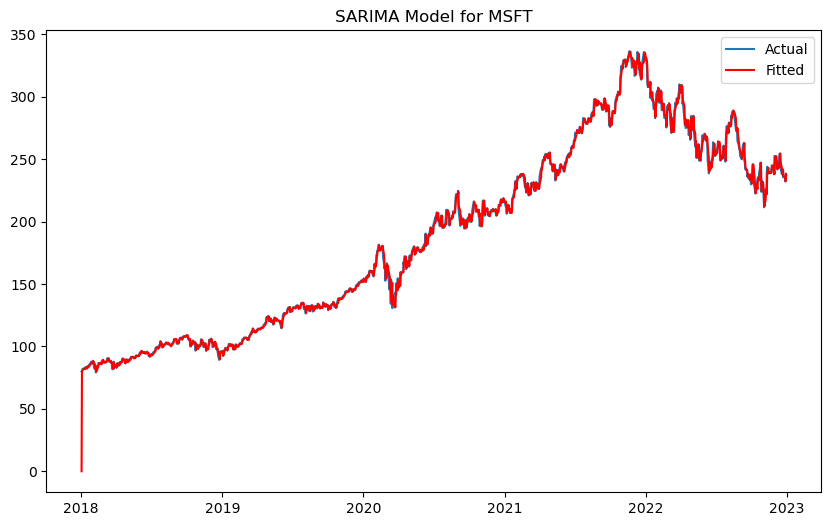

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3456.660
Date:                Mon, 29 Apr 2024   AIC                           6919.319
Time:                        22:47:49   BIC                           6934.726
Sample:                             0   HQIC                          6925.110
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0151      0.147     -0.103      0.918      -0.303       0.272
ma.L1         -0.1104      0.149     -0.742      0.458      -0.402       0.181
sigma2        14.3875      0.360     39.942      0.0

In [48]:
# Function to fit SARIMA model and plot results
def fit_sarima(series, order, seasonal_order, title):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Actual')
    plt.plot(results.fittedvalues, color='red', label='Fitted')
    plt.title(title)
    plt.legend()
    plt.show()

    print(results.summary())
    return results

# Fitting SARIMA model for AAPL
sarima_aapl = fit_sarima(data['AAPL'], (1, 1, 1), (0, 0, 0, 0), 'SARIMA Model for AAPL')

# Fitting SARIMA model for MSFT
sarima_msft = fit_sarima(data['MSFT'], (1, 1, 1), (0, 0, 0, 0), 'SARIMA Model for MSFT')


#### Refining SARIMA model parameters #####

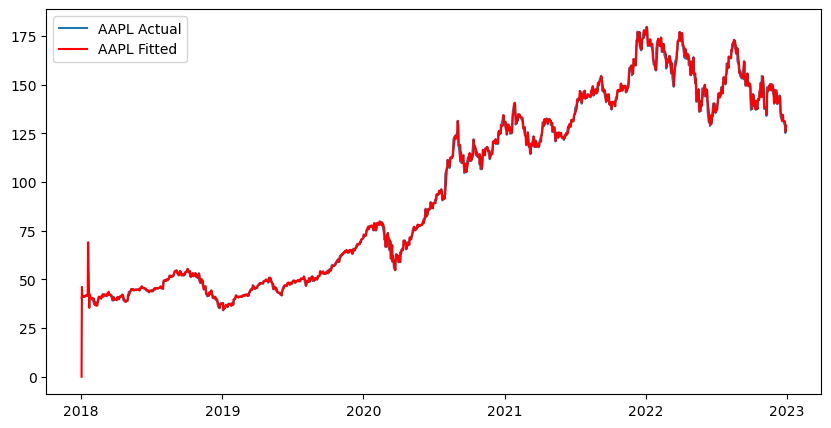

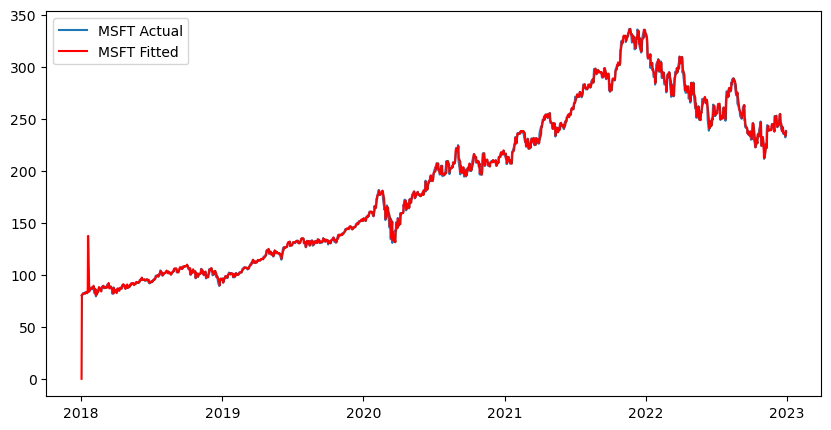

                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2741.693
Date:                            Mon, 29 Apr 2024   AIC                           5491.386
Time:                                    22:56:47   BIC                           5511.852
Sample:                                         0   HQIC                          5499.086
                                           - 1259                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4033      0.255      1.579      0.114      -0.097       0.904
ma.L1         -0.4636      0.249   

In [50]:
# SARIMA Model Setup 2
model_aapl = SARIMAX(data['AAPL'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results_aapl = model_aapl.fit()

model_msft = SARIMAX(data['MSFT'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results_msft = model_msft.fit()

# Plot results 2
plt.figure(figsize=(10, 5))
plt.plot(data['AAPL'], label='AAPL Actual')
plt.plot(results_aapl.fittedvalues, color='red', label='AAPL Fitted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(data['MSFT'], label='MSFT Actual')
plt.plot(results_msft.fittedvalues, color='red', label='MSFT Fitted')
plt.legend()
plt.show()

print(results_aapl.summary())
print(results_msft.summary())


                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2741.693
Date:                            Mon, 29 Apr 2024   AIC                           5491.386
Time:                                    23:05:30   BIC                           5511.852
Sample:                                         0   HQIC                          5499.086
                                           - 1259                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4033      0.255      1.579      0.114      -0.097       0.904
ma.L1         -0.4636      0.249   

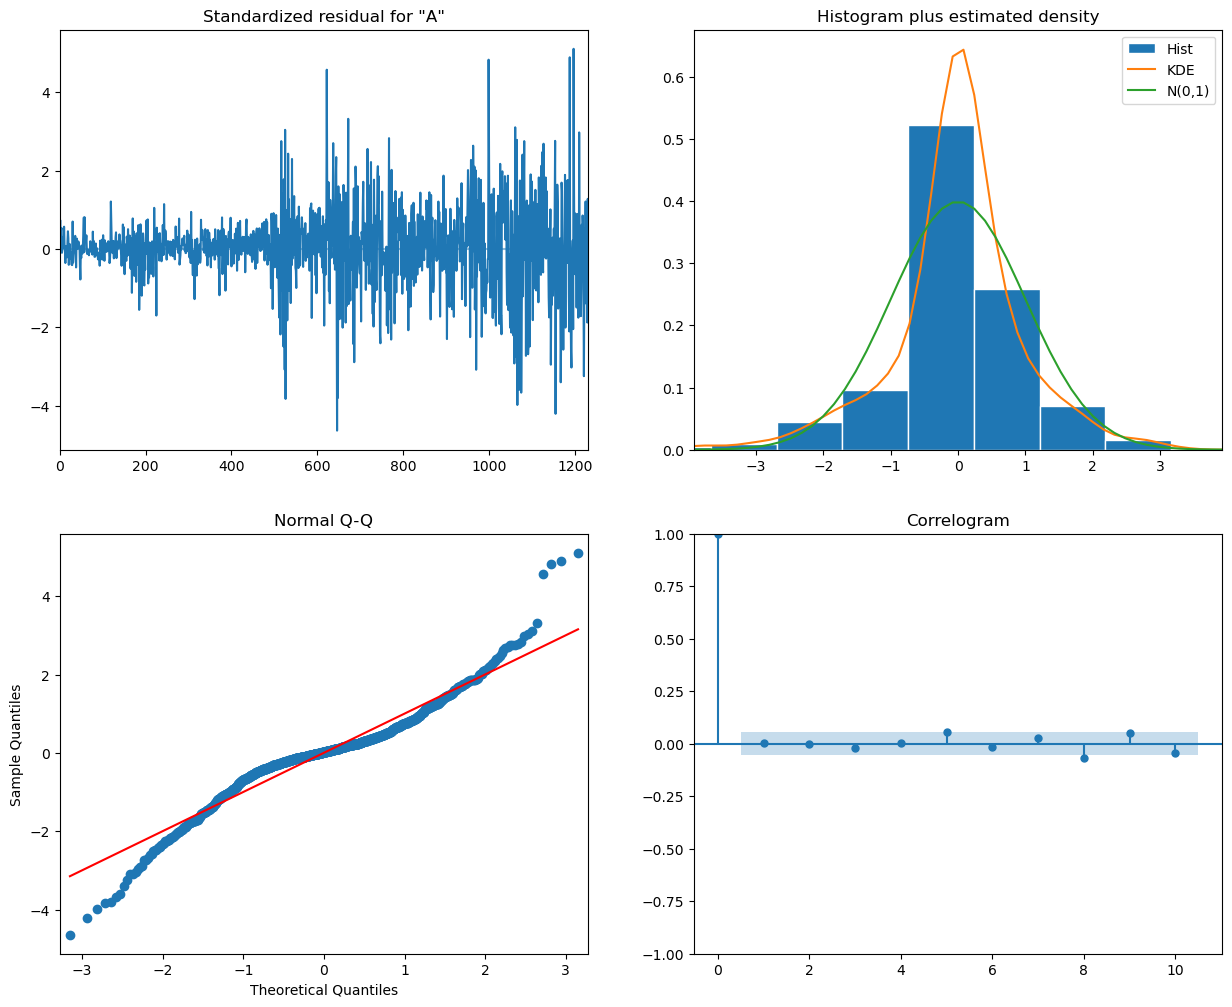

In [52]:
# Define the SARIMAX Model using refined parameters
def refined_sarimax_model(series, order, seasonal_order):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    print(results.summary())
    
    # Plot the diagnostics
    results.plot_diagnostics(figsize=(15, 12))
    plt.show()
    
    return results

# Running the refined SARIMAX model for AAPL
order = (1, 1, 1)  # Non-seasonal parameters
seasonal_order = (0, 1, 1, 12)  # Seasonal parameters: experimenting with annual seasonality
results_aapl = refined_sarimax_model(data['AAPL'], order, seasonal_order)


##### Implemeting time series cross validation #####

In [53]:
from sklearn.metrics import mean_squared_error


# Load your stock data
data = pd.read_csv('AAPL_MSFT_stock_prices.csv', index_col='Date', parse_dates=True)
series = data['AAPL']  # Example with Apple's stock prices

# Time Series Cross-Validation
def time_series_cv(series, n_splits, order, seasonal_order):
    n_records = len(series)
    fold_size = int(n_records / n_splits)
    
    mse_scores = []
    
    for i in range(n_splits):
        train_end = i * fold_size + fold_size
        test_end = train_end + fold_size
        
        if test_end > n_records:
            test_end = n_records
        
        train_data = series[:train_end]
        test_data = series[train_end:test_end]
        
        model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, 
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        
        predictions = results.predict(start=train_end, end=test_end-1)
        mse = mean_squared_error(test_data, predictions)
        mse_scores.append(mse)
    
    return mse_scores

# Define model parameters
order = (1, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Perform cross-validation
mse_scores = time_series_cv(series, 5, order, seasonal_order)
average_mse = np.mean(mse_scores)

print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE: {average_mse}')


MSE scores for each fold: [274.29136422676595, 504.02862344801594, 311.9356002526031, 2095.9908794950215, 14.020732843326686]
Average MSE: 640.0534400531467
